In [ ]:
import cv2

In [1]:
# resim gösterme 

img=cv2.imread('klon.jpg')    #resmi okuma  not:'0' argümanı eklenirse siyahbeyaz okunur
cv2.namedWindow("image",cv2.WINDOW_NORMAL)     #açılan pencere boyutunu değiştirilebilir yapma

In [ ]:
cv2.imshow("image",img)    #resmi gösterme
cv2.imwrite("klon1.jpg",img)    #resmi kaydetme
cv2.waitKey(0) ; cv2.destroyAllWindows()

In [ ]:
import cv2

In [ ]:
#yeniden boyutlandırma

img=cv2.imread('klon.jpg')
img=cv2.resize(img,(640,480))  #yeniden boyutlandırma
cv2.imshow('img',img)
cv2.waitKey(0);cv2.destroyAllWindows()

In [1]:
import cv2

In [2]:
# en boy oranını koruyarak yeniden boyutlandırma

def resizewithAspectRatio(img,width=None,height=None,inter=cv2.INTER_AREA):    #INTERAREA:boyut hatası olmaması için
    dimension=None
    (h,w)=img.shape[:2]
    
    if width is None and height is None:
        return img
    if width is None:
        r=height/float(h)
        dimension= (int(w*r),height)
    else:
        r = width / float(w)
        dimension= (width, int(h*r))
    
    return cv2.resize(img,dimension,interpolation=inter)

In [ ]:
img=cv2.imread('klon.jpg')
img1=resizewithAspectRatio(img,width=None,height=600,inter=cv2.INTER_AREA)
cv2.imshow('Original',img)
cv2.imshow('Resized',img1)
cv2.waitKey(0);cv2.destroyAllWindows


In [1]:
import cv2

In [2]:
cap = cv2.VideoCapture(0)     # 0:webcam / 1:haricikamera / 'smile.mp4':video

In [ ]:
#webcamden gösterme

while True:
    ret,frame=cap.read()     #ret:doğru okuduysa TRUE okuyamadıysa FALSE döner frame:kare
    frame = cv2.flip(frame,1)  #flip:kareyi yansıtma fonksiyonu
    cv2.imshow('webcam',frame)
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
    
cap.release() # serbest bırakıp kapatıyoruz
cv2.destroyAllWindows()

In [ ]:
#videodan gösterme

cap = cv2.VideoCapture('smile.mp4')   
while True:
    ret,frame=cap.read()
    if ret==0:   #videodaki framelerden 0 dönerse çık
        break  
    cv2.imshow('video',frame)
    if cv2.waitKey(15) & 0xFF==ord("q"):
        break
    
cap.release() 
cv2.destroyAllWindows()
    

In [2]:
#webcamden kaydetme

cap=cv2.VideoCapture(0) #kamera nesnesi

fileName='Webcam.avi' #videonun adı
codec=cv2.VideoWriter_fourcc('W','M','V','2') #ses ve görüntüyü birleştirmek için bulunan çeşitli algoritmalardan birini seçiyoruz.
frameRate=30  #fps
resolution=(640,480)  #çözünürlük

videoFileOutput= cv2.VideoWriter(fileName,codec,frameRate,resolution) #kaydetme ayarları

while True:
    ret,frame=cap.read()
    frame = cv2.flip(frame,1)
    videoFileOutput.write(frame)
    cv2.imshow('webcam Live',frame)
    if cv2.waitKey(1) & 0xFF== ord("q"):
        break
videoFileOutput.release()
cap.release()
cv2.destroyAllWindows()

In [ ]:
# telefon kamerasından görüntü alma

import cv2
import requests
import numpy as np

url='http://192.168.1.10:8888/video' #ip webcam uygulamasındaN alınan url

while True:
    img_resp=requests.get(url)
    img_arr=np.array(bytearray(img_resp.content),dtype=np.uint8)   #aldığımız görüntüyü array içinde tutuyoruz
    img=cv2.imdecode(img_arr,cv2.IMREAD_COLOR)   #hafızadan çekileni görüntülenebilir hale getirelim imreadcolor:renkli
    img=cv2.resize(img,(640,480))
    
    cv2.imshow('myMobilePhoneCamera',img)
    
    if cv2.waitKey(1)==27:
        break
    
cv2.destroyAllWindows()
    

In [3]:
import cv2
import numpy as np

In [5]:
# array ile siyah(0,0,0) frame oluşturma(BGR)

canvas=np.zeros((512,512,3),dtype=np.uint8) 
#canvas:tuval
cv2.imshow('canvas',canvas)
cv2.waitKey(0) ; cv2.destroyAllWindows()

In [6]:
# array ile beyaz(255,255,255) frame oluşturma(BGR)

canvas=np.zeros((512,512,3),dtype=np.uint8)+255 
#canvas:tuval
cv2.imshow('canvas',canvas)
cv2.waitKey(0) ; cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#çizim fonksiyonları


#tuval
canvas=np.zeros((512,512,3),dtype=np.uint8)+255 

#çizgi
cv2.line(canvas,(50,50),(512,512),(255,0,0),thickness=5) #line(array,nereden,nereye,renk,kalınlık) 

#dikdörtgen
cv2.rectangle(canvas,(20,20),(50,50),(0,255,0),thickness=2)  #rectangle(array,solüstköşenoktası,sağaltköşenoktası,renk,kalınlık) /içi dolu için:thickness=-1

#çember
cv2.circle(canvas,(250,250),100,(0,0,255),thickness=5) #cirle(array, merkeznoktası,yarıçapı,renk,kalınlık)/içi dolu için:thickness=-1

#çokgen
points=np.array([[110,200],[330,200],[290,220],[100,100]],np.int32)
cv2.polylines(canvas,[points],True,(0,0,100),5)  #polylines(array,koordinatlar,kapalı-açık,renk,kalınlık)

#elips
cv2.ellipse(canvas,(300,300),(100,50),0,0,360,(255,255,0),-1) #ellipse(array,merkeznoktası,genişlik-yükseklik,yatayeksenleaçısı,başlangıç-bitişaçısı,renk,kalınlık)

#yazı
font1=cv2.FONT_HERSHEY_SIMPLEX
font2=cv2.FONT_HERSHEY_COMPLEX
font3=cv2.FONT_HERSHEY_SCRIPT_COMPLEX
cv2.putText(canvas,'Opencv',(50,250),font1,4,(0,0,0),cv2.LINE_AA) #putText(array,metin,solaltköşenoktası,font,büyüklük,renk,yazıtipi)

cv2.imshow('canvas',canvas)
cv2.waitKey(0) ; cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#trackbar oluşturma(RGB RENK BULUCU)


def nothing(x):
    pass

img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar("R",'image',0,255,nothing)  #createTrackbar( isim,pencere,değer aralığı,fonksiyon)
cv2.createTrackbar("G",'image',0,255,nothing)
cv2.createTrackbar("B",'image',0,255,nothing)
switch='0: OFF, 1: ON'
cv2.createTrackbar(switch,'image',0,1,nothing)

while True:
    cv2.imshow('image',img)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
    r=cv2.getTrackbarPos('R','image')
    g=cv2.getTrackbarPos('G','image')
    b=cv2.getTrackbarPos('B','image')
    s=cv2.getTrackbarPos(switch,'image')
    
    if s==0:
        img[:]=[0,0,0]
    if s==1:
        img[:]=[b,g,r]
        
cv2.destroyAllWindows()

In [ ]:
#TEMEL İŞLEMLER

In [1]:
import cv2
import numpy as np

In [2]:
#piksel işlemleri


img=cv2.imread('klon.jpg')

dimension=img.shape  #resmin kaça kaçlık olduğunu döner
print(dimension)

cv2.imshow('image',img)
cv2.waitKey(0); cv2.destroyAllWindows()

(426, 640, 3)


In [ ]:
img=cv2.imread('klon.jpg')

color=img[150,200] #belirli bir pikselin BGR değerlerine(mavi,yeşil,kırmızı) erişmek
print(color)

cv2.imshow('image',img)
cv2.waitKey(0); cv2.destroyAllWindows()

[160 153 144]


In [2]:
img=cv2.imread('klon.jpg')

blue=img[150,200][0]  #belirli bir pikselin mavi değerine erişmek 
#alternatif  blue=img[150,200,0]
print(blue)

cv2.imshow('image',img)
cv2.waitKey(0); cv2.destroyAllWindows()

160


In [ ]:
img=cv2.imread('klon.jpg')

img[150,200,0]= 250  #belirli bir pikselin mavi değerini değiştirmek
#alternatif img.itemset((150,200,0),172)  argüman:(piksel koordinatı,yeni değer)
print(img[150,200,0])

cv2.imshow('image',img)
cv2.waitKey(0); cv2.destroyAllWindows()

250


In [1]:
import cv2
import numpy as np

In [2]:
# roi: region of interest: ilgili alan

In [ ]:
img=cv2.imread('klon.jpg')

roi =img[30:200,200:400]
cv2.imshow('roi',roi)

cv2.imshow('image',img)
cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#resimler üzerinde toplama işlemi

#iki adet resim oluşturuyoruz
circle=np.zeros((512,512,3),np.uint8)+255
cv2.circle(circle,(256,256),60,(255,0,0),-1)
rectangle=np.zeros((512,512,3),np.uint8)+255
cv2.rectangle(rectangle,(150,150),(350,350),(0,0,255),-1)

add=cv2.add(circle,rectangle)  #piksellerin BGR değerleri toplanır.

cv2.imshow('image',add)
cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
#ağırlıklı toplama ( f(x,y) = x*a + y*b + c  )

circle=np.zeros((512,512,3),np.uint8)+255
cv2.circle(circle,(256,256),60,(255,0,0),-1)
rectangle=np.zeros((512,512,3),np.uint8)+255
cv2.rectangle(rectangle,(150,150),(350,350),(0,0,255),-1)

dst=cv2.addWeighted(circle,0.7,rectangle,0.3,0) # addWeight(resim1,resim1ağırlığı,resim2,resim2ağırlığı,sabitsayı(c))

cv2.imshow('image',dst)
cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#RENK UZAYI


img=cv2.imread('klon.jpg')
# görüntü şuan BGR formatında bu değiştirilir ancak bozulmalar meydana gelebilir.
cv2.imshow('image',img)
cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
#resmi BGR'dan RGB'ye dönüştürme

img=cv2.imread('klon.jpg')

img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGR to RGB 

cv2.imshow('image',img1)
cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
#diğer uzaylar
img=cv2.imread('klon.jpg')

img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #BGR to HSV 
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #BGR to GRAY

cv2.imshow('hsv',img_hsv)
cv2.imshow('grayscale',img_gray)

cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [2]:
#Videonun renk uzayını dönüştürmek


cap=cv2.VideoCapture('smile.mp4')
while True:
    ret,frame=cap.read()
    
    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) #DÖNÜŞÜM İŞLEMİ
    
    if ret==False:
        break
    cv2.imshow('Video',frame)
    if cv2.waitKey(30) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [2]:
#Renklerin HSV kodlarını bulmak için Trackbar


cap=cv2.VideoCapture(0) 

def nothing(x):
    pass

cv2.namedWindow('Trackbar')
cv2.resizeWindow('Trackbar',500,500)

cv2.createTrackbar('Lower - H',"Trackbar",0,180,nothing) #createTrackbar( isim,pencere,değer aralığı,fonksiyon)
cv2.createTrackbar('Lower - S',"Trackbar",0,255,nothing)
cv2.createTrackbar('Lower - V',"Trackbar",0,255,nothing)

cv2.createTrackbar('Upper - H',"Trackbar",0,180,nothing)
cv2.createTrackbar('Upper - S',"Trackbar",0,255,nothing)
cv2.createTrackbar('Upper - V',"Trackbar",0,255,nothing)

cv2.setTrackbarPos('Upper - H',"Trackbar",180) #setTrackbarPos(isim,pencere,değer)
cv2.setTrackbarPos('Upper - S',"Trackbar",255)
cv2.setTrackbarPos('Upper - V',"Trackbar",255) 

while True:
    ret,frame=cap.read()
    frame=cv2.flip(frame,1) #görüntü yansıması
    frame_hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)  
    
    lower_h=cv2.getTrackbarPos('Lower - H', 'Trackbar')
    lower_s=cv2.getTrackbarPos('Lower - S', 'Trackbar')
    lower_v=cv2.getTrackbarPos('Lower - V', 'Trackbar')
    
    upper_h=cv2.getTrackbarPos('Upper - H', 'Trackbar')
    upper_s=cv2.getTrackbarPos('Upper - S', 'Trackbar')
    upper_v=cv2.getTrackbarPos('Upper - V', 'Trackbar')
    
    lower_color=np.array([lower_h,lower_s,lower_v])
    upper_color=np.array([upper_h,upper_s,upper_v])
    
    mask= cv2.inRange(frame_hsv,lower_color,upper_color)
    
    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    
    if cv2.waitKey(20) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

In [ ]:
#Smoothing images:resimdeki gürültüyü,pürüzü azaltmak,yumuşak hale getirmek için filtre

#gaussian blur kullanımı
img_filter=cv2.imread('filter.png')
img_median=cv2.imread('median.png')
img_bilateral=cv2.imread('bilateral.png')

blur = cv2.blur(img_filter,(5,5)) #pozitif tek sayı olmalı örn:5
blur_g=cv2.GaussianBlur(img_filter,(11,11),cv2.BORDER_DEFAULT) #BORDER_DEFAULT:sınır çizgisiyle alakalı

cv2.imshow('original',img_filter)
cv2.imshow('blur',blur)
cv2.imshow('blur_g',blur_g)


cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
#median blur kullanımı
img_median=cv2.imread('median.png')

blur_m=cv2.medianBlur(img_median,5) #5:kernel size

cv2.imshow('original',img_median)
cv2.imshow('blur_m',blur_m)

cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
#bilateral kullanımı

img_bilateral=cv2.imread('bilateral.png')

blur_b=cv2.bilateralFilter(img_bilateral,9,75,75) # 9,75,75:piksel dönüşüm değerleri

cv2.imshow('original',img_bilateral)
cv2.imshow('blur_b',blur_b)

cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [2]:
#Bitwise işlemleri


img1=cv2.imread('bitwise_1.png')
img2=cv2.imread('bitwise_2.png')

bit_and=cv2.bitwise_and(img2,img1) # AND bağlacı ile birleştirdi **** 0 AND 1= 0 **** 1 AND 1= 1 gibi... 
#bitwise_or,bitwise_xor, bitwise_not...

cv2.imshow('bit_and',bit_and)
cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.waitKey(0); cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

In [ ]:
#Resmin dönüşüm dizeyi(matrix)


#resmi kesip kaydıracağız
img=cv2.imread('klon.jpg',0)  #0:siyah beyaz okur
row,col = img.shape

M= np.float32([[1,0,10],[0,1,70]]) #matris tanımı 

dst= cv2.warpAffine(img,M,(row,col)) #warpAffine(resim,matris,satır-sütun):resmi istediğimiz kadar kaydırma fonksiyonu
cv2.imshow('dst',dst)
cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#Resmi döndürme


img=cv2.imread('klon.jpg',0)  #0:siyah beyaz okur
row,col = img.shape

M= cv2.getRotationMatrix2D((col/2,row/2),90,1) #getRotationMatrix2D(sütun-satır,yönaçısı,ölçek)
dst=cv2.warpAffine(img,M,(col,row))

cv2.imshow('dst',dst)
cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#Thresholding : eşik değere göre piksel filtreleme


img=cv2.imread('klon.jpg',0)

ret,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY) #threshold(resim,aralık)
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) #dökümantasyonda bu tarz fonksiyonlar mevcut
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

cv2.imshow('img',img)
cv2.imshow('img-th1',th1)
cv2.imshow('img-th2',th2)
cv2.imshow('img-th3',th3)
cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#Morfolojik dönüşümler


#erozyon yöntemi: resmi erozyona uğratır
img=cv2.imread('klon.jpg')

kernel=np.ones((5,5),np.uint8)
erosion=cv2.erode(img,kernel,iterations=2) #erode(resim,matris,tekrar)

cv2.imshow('img',img)
cv2.imshow('erosion',erosion)
cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
#dilation yöntemi :kalınlaştırır
img=cv2.imread('klon.jpg')

kernel=np.ones((5,5),np.uint8)
dilation=cv2.dilate(img,kernel,iterations=2) #dilate(resim,matris,tekrar)

cv2.imshow('img',img)
cv2.imshow('dilation',dilation)
cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
#morphologyEx yöntemi:resmin üzerindeki gürültüyü kaldırır
img=cv2.imread('klon.jpg')

kernel=np.ones((5,5),np.uint8)
opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel) #dilate(resim,bayrak,matris)
#closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)   
#gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)   

cv2.imshow('img',img)
cv2.imshow('opening',opening)
cv2.waitKey(0); cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

In [ ]:
#Histogram

#resmin piksel dağılımının görselleştirmesi
img=np.zeros((500,500),np.uint8)

cv2.imshow('img',img)
plt.hist(img.ravel(),256,[0,256]) #hist(resim,matrisi tek satıra çeviren ravel fonksiyonu,kaç değer olduğu,değer aralığı)
plt.show()
cv2.waitKey(0); cv2.destroyAllWindows()

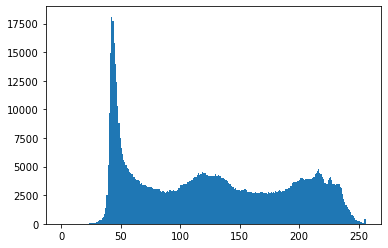

In [ ]:
img=cv2.imread('klon.jpg')
cv2.imshow('img',img)

plt.hist(img.ravel(),256,[0,256])
plt.show()
cv2.waitKey(0); cv2.destroyAllWindows()

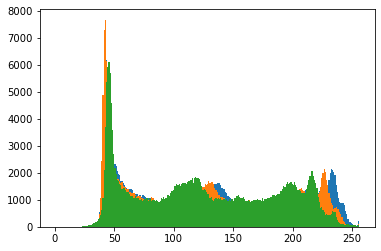

In [ ]:
#BGR değerlerini gösterme
img=cv2.imread('klon.jpg')

b,g,r=cv2.split(img) # split:bgr değerlerine ayıran fonksiyon

cv2.imshow('img',img)

#plt.hist(img.ravel(),256,[0,256])
plt.hist(b.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(r.ravel(),256,[0,256])
plt.show()
cv2.waitKey(0); cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

In [ ]:
#Corner Detection 

#goodFeaturesToTrack
img=cv2.imread('text.png')
img1=cv2.imread('contour.png')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray=np.float32(gray) #direkt işleme sokulamadığı için float32 dönüşümü gerekir
corner=cv2.goodFeaturesToTrack(gray,50,0.01,10) #goodFeaturesToTrack(resim,maxkaçköşe,kalitedeğeri,minmesafe)

corners=np.int0(corner) # çember çizerken float kullanamadığımız için tekrar dönüşüm gerekir
for corner in corners:
    x,y=corner.ravel()
    cv2.circle(img,(x,y),3,(0,0,255),-1)
    
cv2.imshow('corner',img)
cv2.waitKey(0); cv2.destroyAllWindows()

In [4]:
#Canny kenar yöntemi

cap=cv2.VideoCapture(0)

while 1:
    ret,frame=cap.read()
    frame=cv2.flip(frame,1)
    edges=cv2.Canny(frame,100,200) #Canny(resim,minthreshold,maxthreshold)
    cv2.imshow('Frame',frame)
    cv2.imshow('Edges',edges)
    
    if cv2.waitKey(5) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()